In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plotly
import numpy as np
import cv2

In [2]:
df1 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_D_5thMay21_2ndDec22.csv')
df0 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_D_1stOct19_4May21.csv')
df2 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_D_2ndDec22_6thJan22.csv')
daily_data = df0.append([df1, df2], ignore_index=True)
dfh1 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_30thSep19_13thFeb20.csv')
dfh2 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_13thFeb20_3rdJul20.csv')
dfh3 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_3rdJul20_20thOct20.csv')
dfh4 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_20thOct_9thFeb21.csv')
dfh5 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_9thFeb21_3rdJun21.csv')
dfh6 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_3rdJun21_21thSep21.csv')
dfh7 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_22ndSep21_13thJan22.csv')
dfh8 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_13thJan22_9thMay22.csv')
dfh9 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_9thMay22_26thAug22.csv')
dfh10 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_26thAug22_19thDec22.csv')
dfh11 = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/ibul_hr_19thDec22_9thJan23.csv')

df_hour_final = dfh1.append([dfh2,dfh3,dfh4,dfh5,dfh6,dfh7,dfh8,dfh9,dfh10,dfh11], ignore_index=True)
df_hour_final.head()

/var/folders/mk/ypdhd44j2bj08ls04v6_sddm0000gp/T/ipykernel_56048/3629750618.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_data = df0.append([df1, df2], ignore_index=True)
/var/folders/mk/ypdhd44j2bj08ls04v6_sddm0000gp/T/ipykernel_56048/3629750618.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_hour_final = dfh1.append([dfh2,dfh3,dfh4,dfh5,dfh6,dfh7,dfh8,dfh9,dfh10,dfh11], ignore_index=True)


,Unnamed: 0,index,open_price,close_price,max_price,min_price,red_green,x_coord,time
0,0,1,360.81,360.81,361.00,302.47,red,9.0,2019-09-30 09:15:00
1,1,2,302.67,303.24,317.20,297.31,green,13.0,2019-09-30 10:15:00
2,2,3,303.05,268.05,304.01,241.08,red,16.0,2019-09-30 11:15:00
3,3,4,268.05,273.21,288.70,265.18,green,20.0,2019-09-30 12:15:00
4,4,5,273.02,264.61,282.39,253.51,red,24.0,2019-09-30 13:15:00


In [3]:
df_hour_final.to_csv('/Users/dhanuvardhan/Documents/stock_experiments/wtime_final_hour_data.csv')
daily_data.to_csv('/Users/dhanuvardhan/Documents/stock_experiments/wtime_final_daily_data.csv')

In [4]:
hourly_data = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/wtime_final_hour_data.csv', infer_datetime_format=True, parse_dates=[9])
daily_data = pd.read_csv('/Users/dhanuvardhan/Documents/stock_experiments/wtime_final_daily_data.csv', infer_datetime_format=True, parse_dates=[9])
hourly_data['date'] = hourly_data['time'].apply(lambda x:x.date())
daily_data = daily_data.drop(columns = {'Unnamed: 0', 'index', 'x_coord', 'Unnamed: 0.1'})
hourly_data = hourly_data.drop(columns = {'Unnamed: 0', 'index', 'x_coord', 'Unnamed: 0.1'})
data_type={'min_price':float, 'max_price':float, 'close_price':float, 'open_price':float}
daily_data = daily_data.astype(data_type)
hourly_data = hourly_data.astype(data_type)

In [5]:
bin_size = 0.25
nbins = int((max(hourly_data[hourly_data['close_price']<160]['close_price'])-min(hourly_data[hourly_data['close_price']<160]['close_price']))/bin_size)
print(nbins)
fg = plotly.histogram(hourly_data[hourly_data['close_price']<160]['close_price'], nbins = nbins, title = 'hourly data closing price distribution')
#fg.title('daily data closing price distribution')
fg.show()

293


In [6]:
daily_data.tail()

,open_price,close_price,max_price,min_price,red_green,time
805,155.19,154.78,157.97,154.00,red,2022-12-30
806,155.42,150.67,156.06,150.03,red,2022-12-31
807,151.40,151.40,151.44,144.04,red,2023-01-03
808,146.01,144.04,146.28,140.85,red,2023-01-04
809,144.04,140.25,144.87,138.61,red,2023-01-05


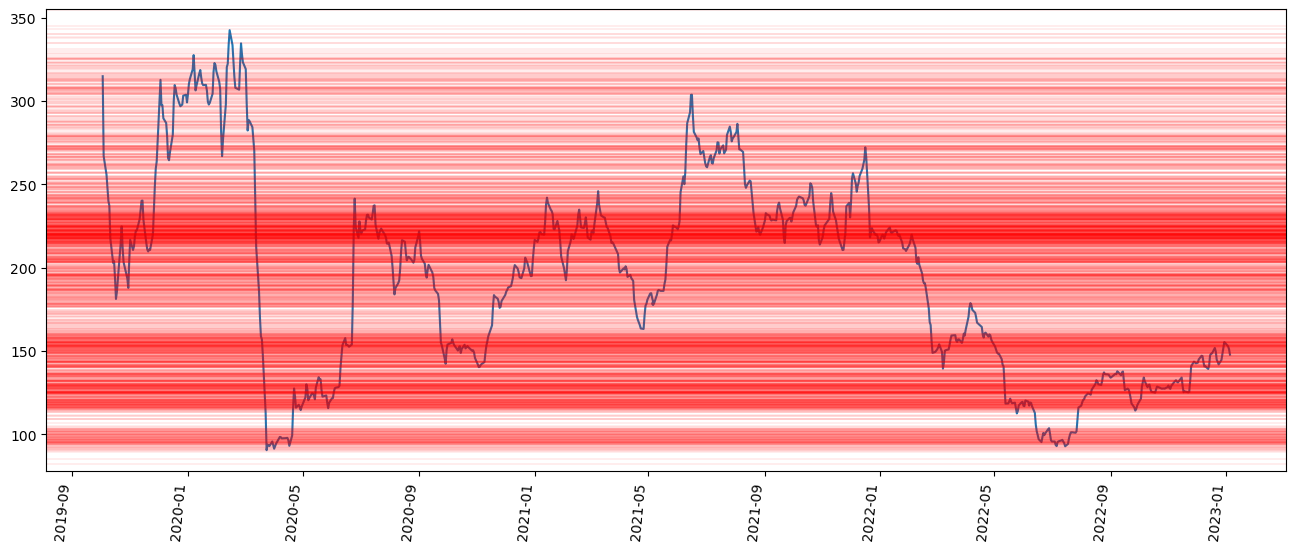

In [7]:
window = 2
ma, time_ = [], []
for i in range(window,len(daily_data['close_price'])):
    ma.append(np.mean(daily_data['close_price'].values[i-window:i]))
    time_.append(daily_data['time'].iloc[i])
plt.figure(figsize=(16,6))
plt.plot(time_, ma)
plt.xticks(rotation=85, ha='right')
for i in range(window, len(daily_data)):
    plt.axhline(y=daily_data['close_price'].iloc[i], color = 'red', linewidth = 0.1)
    plt.axhline(y=daily_data['open_price'].iloc[i], color = 'red', linewidth = 0.1)
plt.show()

In [8]:
hourly_data.head()

,open_price,close_price,max_price,min_price,red_green,time,date
0,360.81,360.81,361.00,302.47,red,2019-09-30 09:15:00,2019-09-30
1,302.67,303.24,317.20,297.31,green,2019-09-30 10:15:00,2019-09-30
2,303.05,268.05,304.01,241.08,red,2019-09-30 11:15:00,2019-09-30
3,268.05,273.21,288.70,265.18,green,2019-09-30 12:15:00,2019-09-30
4,273.02,264.61,282.39,253.51,red,2019-09-30 13:15:00,2019-09-30


In [10]:
week_window = 5
PnL = 0
total_trades = 0
profit_trades = 0
loss_trades = 0
for index in range(week_window, len(daily_data)):
    week_min = np.min(daily_data['min_price'].values[index-week_window:index])
    week_max = np.max(daily_data['max_price'].values[index-week_window:index])
    week_ocmax = max(np.max(daily_data['open_price'].values[index-week_window:index]), np.max(daily_data['close_price'].values[index-week_window:index]))
    week_ocmin = min(np.min(daily_data['open_price'].values[index-week_window:index]), np.min(daily_data['close_price'].values[index-week_window:index]))
    PDH = daily_data['max_price'].iloc[index-1]
    PDL = daily_data['min_price'].iloc[index-1]
    PDO = daily_data['open_price'].iloc[index-1]
    PDC = daily_data['close_price'].iloc[index-1]
    #print(PDH, PDL, PDO, PDC)
    hr_date = hourly_data[hourly_data['date']==daily_data['time'].iloc[index].date()] 
    inventory = 0
    qty = 0
    buy = False
    sell = False
    sellprice = False
    buyprice = False
    targetprice = False
    completedorderprice = False
    stoplossprice = False
    for hr in range(len(hr_date)-1):
        curr_open = hr_date['open_price'].iloc[hr]
        curr_close = hr_date['close_price'].iloc[hr]
        candle = hr_date['red_green'].iloc[hr]
        if inventory==0:
            #import pdb;pdb.set_trace()
            if candle=='green' and curr_open<PDH and curr_close>PDH and abs(curr_close-PDH)<0.5*curr_close/100:
                total_trades+=1
                #broke prev high
                print('Enter buy trade with price', curr_close)
                buy = True
                buyprice=curr_close
                targetprice = curr_close+1*(curr_close/100)
                inventory = 1
                stoplossprice = curr_open
                qty = 1
            elif candle=='red' and curr_open>PDL and curr_close<PDL and abs(curr_close-PDL)<0.5*curr_close/100:
                total_trades+=1
                #broke prev low
                print('Enter sell trade with price', curr_close)
                sell = True
                sellprice=curr_close
                targetprice = curr_close-1*(curr_close/100)
                inventory = -1
                stoplossprice = curr_open
                qty = 1
            elif candle=='green' and curr_open>PDL and curr_close<PDH and PDH-PDL>1*curr_close/100 and curr_close-PDL<0.5*curr_close/100:
                total_trades+=1
                print('Enter buy trade with price', curr_close)
                buy = True
                buyprice = curr_close
                targetprice = curr_close+1*(curr_close/100)
                inventory = 1
                stoplossprice=PDL-0.3*(curr_close/100)
                qty = 1
            elif candle=='red' and curr_open<PDH and curr_close>PDL and PDH-PDL>1*curr_close/100 and PDH-curr_close<0.5*curr_close/100:
                total_trades+=1
                print('Enter sell trade with price', curr_close)
                sell = True
                sellprice = curr_close
                targetprice = curr_close-1*(curr_close/100)
                inventory = -1
                stoplossprice = PDH + 0.3*(curr_close/100)
                qty = 1
        else:
            print('In trade')
            if inventory > 0:
                if (curr_open>targetprice or curr_close>targetprice) and stoplossprice<min(curr_open, curr_close):
                    profit_trades+=1
                    print('proft trade, squared off at', targetprice)
                    PnL+= qty*(targetprice-buyprice)
                    inventory = 0
                    buy = False
                    sell = False
                    sellprice = False
                    buyprice = False
                    targetprice = False
                    completedorderprice = False
                    stoplossprice = False
                elif (curr_open>targetprice or curr_close>targetprice) and stoplossprice>min(curr_open, curr_close):
                    print('both target and stoploss are executing, need further time granularity')
                    inventory = 0
                    buy = False
                    sell = False
                    sellprice = False
                    buyprice = False
                    targetprice = False
                    completedorderprice = False
                    stoplossprice = False
                elif (curr_open<stoplossprice or curr_close<stoplossprice) and targetprice>max(curr_open, curr_close):
                    print('loss trade, squared off at', stoplossprice)
                    PnL+= qty*(stoplossprice-buyprice)
                    inventory = 0
                    buy = False
                    sell = False
                    sellprice = False
                    buyprice = False
                    targetprice = False
                    completedorderprice = False
                    stoplossprice = False
            elif inventory<0:
                if (curr_open<targetprice or curr_close<targetprice) and stoplossprice>max(curr_open, curr_close):
                    profit_trades+=1
                    print('proft trade, squared off at', targetprice)
                    PnL+= qty*(sellprice-targetprice)
                    inventory = 0
                    buy = False
                    sell = False
                    sellprice = False
                    buyprice = False
                    targetprice = False
                    completedorderprice = False
                    stoplossprice = False
                elif (curr_open<targetprice or curr_close<targetprice) and stoplossprice<max(curr_open, curr_close):
                    print('both target and stoploss are executing, need further time granularity')
                    inventory = 0
                    buy = False
                    sell = False
                    sellprice = False
                    buyprice = False
                    targetprice = False
                    completedorderprice = False
                    stoplossprice = False
                elif (curr_open>stoplossprice or curr_close>stoplossprice) and targetprice<min(curr_open, curr_close):
                    print('loss trade, squared off at', stoplossprice)
                    PnL+= qty*(sellprice-stoplossprice)
                    inventory = 0
                    buy = False
                    sell = False
                    sellprice = False
                    buyprice = False
                    targetprice = False
                    completedorderprice = False
                    stoplossprice = False
            else:
                print('indecisive candle with open {} and close as {}'.format(curr_open, curr_close))
                print('inventory is {}'.format(inventory))
    #if inventory!=0:import pdb;pdb.set_trace()


Enter buy trade with price 220.23
Enter sell trade with price 207.61
In trade
loss trade, squared off at 208.95
Enter buy trade with price 307.45
In trade
In trade
proft trade, squared off at 310.5245
Enter sell trade with price 312.61
In trade
proft trade, squared off at 309.4839
Enter buy trade with price 308.02
In trade
In trade
loss trade, squared off at 307.83
Enter buy trade with price 310.32
In trade
proft trade, squared off at 313.4232
Enter sell trade with price 316.25
In trade
Enter buy trade with price 311.85
Enter sell trade with price 297.12
Enter buy trade with price 307.26
Enter buy trade with price 327.91
In trade
In trade
Enter sell trade with price 326.3
In trade
loss trade, squared off at 327.04
Enter sell trade with price 326.3
Enter sell trade with price 225.77
In trade
loss trade, squared off at 226.31
Enter sell trade with price 222.62
In trade
loss trade, squared off at 224.68
Enter sell trade with price 219.91
Enter sell trade with price 216.87
In trade
In trad

In [ ]:
daily_data['time'].iloc[5].date()

In [11]:
daily_data['return_%'] = np.round(((daily_data['close_price']-daily_data['close_price'].shift(1))/daily_data['close_price'].shift(1))*100, 2)
daily_data.head()

,open_price,close_price,max_price,min_price,red_green,time,return_%
0,360.72,362.16,362.45,240.26,red,2019-09-30,NaN
1,253.23,267.64,284.36,225.85,green,2019-10-01,-26.10
2,277.15,266.20,306.55,252.37,red,2019-10-03,-0.54
3,266.49,245.45,272.54,241.70,red,2019-10-04,-7.79
4,245.45,234.50,248.04,213.75,red,2019-10-07,-4.46


In [12]:
window = daily_data['return_%'].rolling(window=4)
mean = window.sum()
daily_data['rolling_change']=mean
daily_data.head(20)

,open_price,close_price,max_price,min_price,red_green,time,return_%,rolling_change
0,360.72,362.16,362.45,240.26,red,2019-09-30,NaN,NaN
1,253.23,267.64,284.36,225.85,green,2019-10-01,-26.10,NaN
2,277.15,266.20,306.55,252.37,red,2019-10-03,-0.54,NaN
3,266.49,245.45,272.54,241.70,red,2019-10-04,-7.79,NaN
4,245.45,234.50,248.04,213.75,red,2019-10-07,-4.46,-38.89
5,239.11,239.97,247.18,232.19,green,2019-10-09,2.33,-10.46
6,229.31,195.59,241.13,185.51,red,2019-10-10,-18.49,-28.41
7,190.70,210.00,218.36,176.57,green,2019-10-11,7.37,-13.25
8,211.16,197.90,216.06,193.87,red,2019-10-14,-5.76,-14.55
9,187.24,189.25,196.75,182.34,green,2019-10-15,-4.37,-21.25


In [13]:
supp, resis = {}, {}
daily_data['s_r'] = 'none'

for i in range(5,len(daily_data)):
    if daily_data['return_%'].iloc[i]*daily_data['return_%'].iloc[i-1] < 0:
        #print('change in price direction')
        if abs(daily_data['return_%'].iloc[i])<2:continue
        if daily_data['return_%'].iloc[i] < daily_data['return_%'].iloc[i-1]:
            #print('resistance')
            daily_data['s_r'].iloc[i] = 'resistance'
        else:
            #print('support')
            daily_data['s_r'].iloc[i] = 'support'

print(daily_data[daily_data['s_r']=='support'][['close_price', 'return_%', 'rolling_change']])
    

     close_price  return_%  rolling_change
5         239.97      2.33          -10.46
7         210.00      7.37          -13.25
11        198.19     14.48           -4.17
21        218.65      5.71           15.79
25        238.53      8.66            9.13
..           ...       ...             ...
762       129.53      2.07            1.56
792       144.87      5.14            3.26
795       150.03      2.15            8.73
801       148.84      6.06            2.32
803       155.92      5.79            8.70

[92 rows x 3 columns]


/var/folders/mk/ypdhd44j2bj08ls04v6_sddm0000gp/T/ipykernel_56048/261604521.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mk/ypdhd44j2bj08ls04v6_sddm0000gp/T/ipykernel_56048/261604521.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
daily_data.to_csv('/Users/dhanuvardhan/Documents/stock_experiments/daily_data_return.csv')

In [ ]:
for i in range(len(daily_data)):
    if daily_data['s_r'].iloc[i]=='support':
        print(daily_data.iloc[i])
        time = daily_data['time'].iloc[i]
        close_price_support = daily_data['close_price'].iloc[i]
        hourly_data_part = hourly_data[hourly_data['time']>time]
        for j in range(len(hourly_data_part)):
            if abs(hourly_data_part['close_price'].iloc[j]-close_price_support)<1:
                print(j)
                import pdb;pdb.set_trace()



In [ ]:
daily_data.head()

In [ ]:
for i in range(len(daily_data)):
    if daily_data['s_r'].iloc[i]=='support' or daily_data['s_r'].iloc[i]=='resistance':
        print('its a',daily_data['s_r'].iloc[i])
        print('time is', daily_data['time'].iloc[i])
        print('close price is', daily_data['close_price'].iloc[i])
        print('return is', daily_data['return_%'].iloc[i])
        import pdb;pdb.set_trace()